In [1]:
# Problem Statement:

# Reviews on destinations in 10 categories mentioned across East Asia. 
# Each traveler rating is mapped as Excellent(4), Very Good(3), Average(2), Poor(1), and Terrible(0) and 
# average rating is used.


#Data Set Information:

# This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned 
# across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), 
# Poor (1), and Terrible (0) and average rating is used against each category per user.


#Attribute Information:

#Attribute 1 : Unique user id 
#Attribute 2 : Average user feedback on art galleries 
#Attribute 3 : Average user feedback on dance clubs 
#Attribute 4 : Average user feedback on juice bars 
#Attribute 5 : Average user feedback on restaurants 
#Attribute 6 : Average user feedback on museums 
#Attribute 7 : Average user feedback on resorts 
#Attribute 8 : Average user feedback on parks/picnic spots 
#Attribute 9 : Average user feedback on beaches 
#Attribute 10 : Average user feedback on theaters 
#Attribute 11 : Average user feedback on religious institutions

In [3]:
# Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load the data 
data=pd.read_csv("tripadvisor_review.csv",header=None)

data.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
1,User 1,0.93,1.8,2.29,0.62,0.8,2.42,3.19,2.79,1.82,2.42


In [7]:
col=["id","art_gall","dance_clubs","juics_bars","restaurants","museums","resorts","parks","beaches","theatres","religious_inst"]


In [8]:
data=pd.read_csv("tripadvisor_review.csv",header=None,names=col)

In [9]:
data.head()

,id,art_gall,dance_clubs,juics_bars,restaurants,museums,resorts,parks,beaches,theatres,religious_inst
0,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
1,User 1,0.93,1.8,2.29,0.62,0.8,2.42,3.19,2.79,1.82,2.42
2,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
3,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.8,1.31,2.5
4,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86


In [10]:
data1=data.drop("id",axis=1)
df=data1.drop(0)
df.shape

(980, 10)

In [11]:
df.dtypes

art_gall          object
dance_clubs       object
juics_bars        object
restaurants       object
museums           object
resorts           object
parks             object
beaches           object
theatres          object
religious_inst    object
dtype: object

In [12]:
# Convert all objects into numerical
df1=df.convert_objects(convert_numeric=True) 

C:\Users\joydeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [13]:
df1.dtypes # Reconfirm 

art_gall          float64
dance_clubs       float64
juics_bars        float64
restaurants       float64
museums           float64
resorts           float64
parks             float64
beaches           float64
theatres          float64
religious_inst    float64
dtype: object

In [14]:
df1.shape # Reconfirm

(980, 10)

In [15]:
df1.describe()

,art_gall,dance_clubs,juics_bars,restaurants,museums,resorts,parks,beaches,theatres,religious_inst
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [16]:
# Check for Null Values 
df1.isnull().sum() # No null values 

art_gall          0
dance_clubs       0
juics_bars        0
restaurants       0
museums           0
resorts           0
parks             0
beaches           0
theatres          0
religious_inst    0
dtype: int64

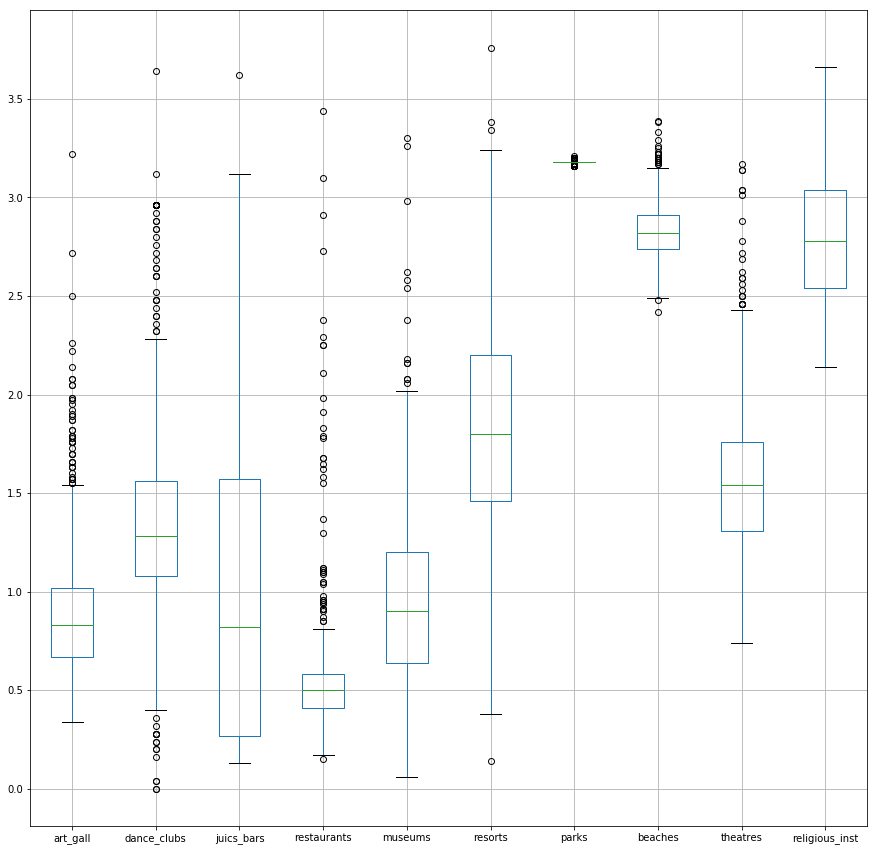

In [17]:
# EDA -Unvariate  (BOXPLOT)
fig=plt.figure(figsize=(15,15))
df1.boxplot() ## Data with outliers 

In [18]:
# EDA-Bivariate 
corr=df1.corr()
corr

,art_gall,dance_clubs,juics_bars,restaurants,museums,resorts,parks,beaches,theatres,religious_inst
art_gall,1.000000,-0.187692,0.008613,0.073456,-0.100483,0.094142,-0.012474,0.020029,-0.047313,0.050700
dance_clubs,-0.187692,1.000000,0.043586,0.131624,0.119631,0.148404,0.110052,-0.158642,0.073342,-0.065762
juics_bars,0.008613,0.043586,1.000000,0.061128,0.281668,0.356435,0.750651,-0.172953,-0.085435,-0.440543
restaurants,0.073456,0.131624,0.061128,1.000000,0.101878,0.215866,0.228348,-0.103583,0.026670,-0.352909
museums,-0.100483,0.119631,0.281668,0.101878,1.000000,0.581306,0.232318,-0.020957,0.041693,-0.247470
resorts,0.094142,0.148404,0.356435,0.215866,0.581306,1.000000,0.430743,0.000071,0.096410,-0.438104
parks,-0.012474,0.110052,0.750651,0.228348,0.232318,0.430743,1.000000,-0.072492,0.084965,-0.710731
beaches,0.020029,-0.158642,-0.172953,-0.103583,-0.020957,0.000071,-0.072492,1.000000,0.169695,0.114701
theatres,-0.047313,0.073342,-0.085435,0.026670,0.041693,0.096410,0.084965,0.169695,1.000000,-0.045682
religious_inst,0.050700,-0.065762,-0.440543,-0.352909,-0.247470,-0.438104,-0.710731,0.114701,-0.045682,1.000000


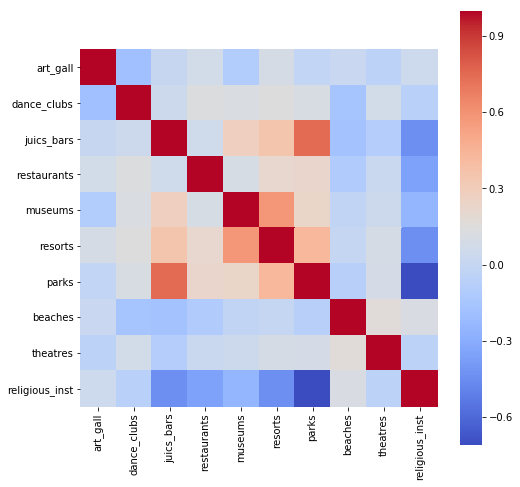

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,cmap="coolwarm")

In [22]:
# DEFINE THE DATA MATRIX

X=df1.iloc[::] # All columns /rows

print(X.shape) # recheck 
X.head(1) # recheck 


(980, 10)


,art_gall,dance_clubs,juics_bars,restaurants,museums,resorts,parks,beaches,theatres,religious_inst
1,0.93,1.8,2.29,0.62,0.8,2.42,3.19,2.79,1.82,2.42


In [23]:

# DataTransformation --Normalization 
from sklearn.preprocessing import Normalizer
scaler=Normalizer().fit(X)
norm_X=scaler.transform(X)
print(norm_X[0:5,:])

[[0.14123565 0.27335932 0.3477738  0.0941571  0.12149303 0.36751641
  0.48445345 0.42370694 0.27639664 0.36751641]
 [0.14205439 0.30639183 0.37045557 0.08913217 0.197762   0.44287546
  0.44705353 0.3662775  0.25904036 0.32310411]
 [0.21894691 0.14357174 0.09691093 0.09511628 0.04307152 0.27637561
  0.57069768 0.5025011  0.23509873 0.4486617 ]
 [0.07511275 0.30045102 0.048406   0.09514282 0.07678193 0.25371419
  0.53079679 0.494075   0.26206005 0.47738328]
 [0.08553123 0.20124995 0.19789579 0.09559373 0.25827077 0.33877076
  0.53331238 0.46622906 0.19789579 0.42597907]]


In [24]:
# DataTransformation --Standardization 
from sklearn.preprocessing import StandardScaler 


In [25]:
scalar1=StandardScaler().fit(X)
rescaled_X=scalar1.transform(X)
print(rescaled_X[0:2,:])

[[ 0.11264465  0.93588703  1.6197497   0.31295986 -0.31960783  1.07016867
   1.15865694 -0.32787224  0.68751758 -1.18059095]
 [ 0.38808847  1.77264397  2.08917107  0.38449354  1.09848562  2.47950035
   3.71605289 -1.49205628  0.797274   -1.49190812]]


In [26]:
# DataTransformation -PCA
from sklearn.decomposition import PCA

In [27]:
pca=PCA(.90) # Captures 90% of the variance 
pca.fit(X)
pca.explained_variance_ratio_

array([0.4252009 , 0.17723144, 0.12453292, 0.07318609, 0.06934675,
       0.05380073])

In [29]:
pca_X=pca.transform(X)
pca_X.shape # Recheck


(980, 6)

In [31]:
## MODEL BUILDING..1 
# Hierarchial ---Using Scipy Library, here default is Euclidean Distance metric .
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster



In [32]:
f=linkage(norm_X,"ward") 
f1=linkage(X,"ward")
f3=linkage(norm_X,"average")
f4=linkage(norm_X,"complete")
f5=linkage(pca_X,"ward")
f6=linkage(rescaled_X,"ward")

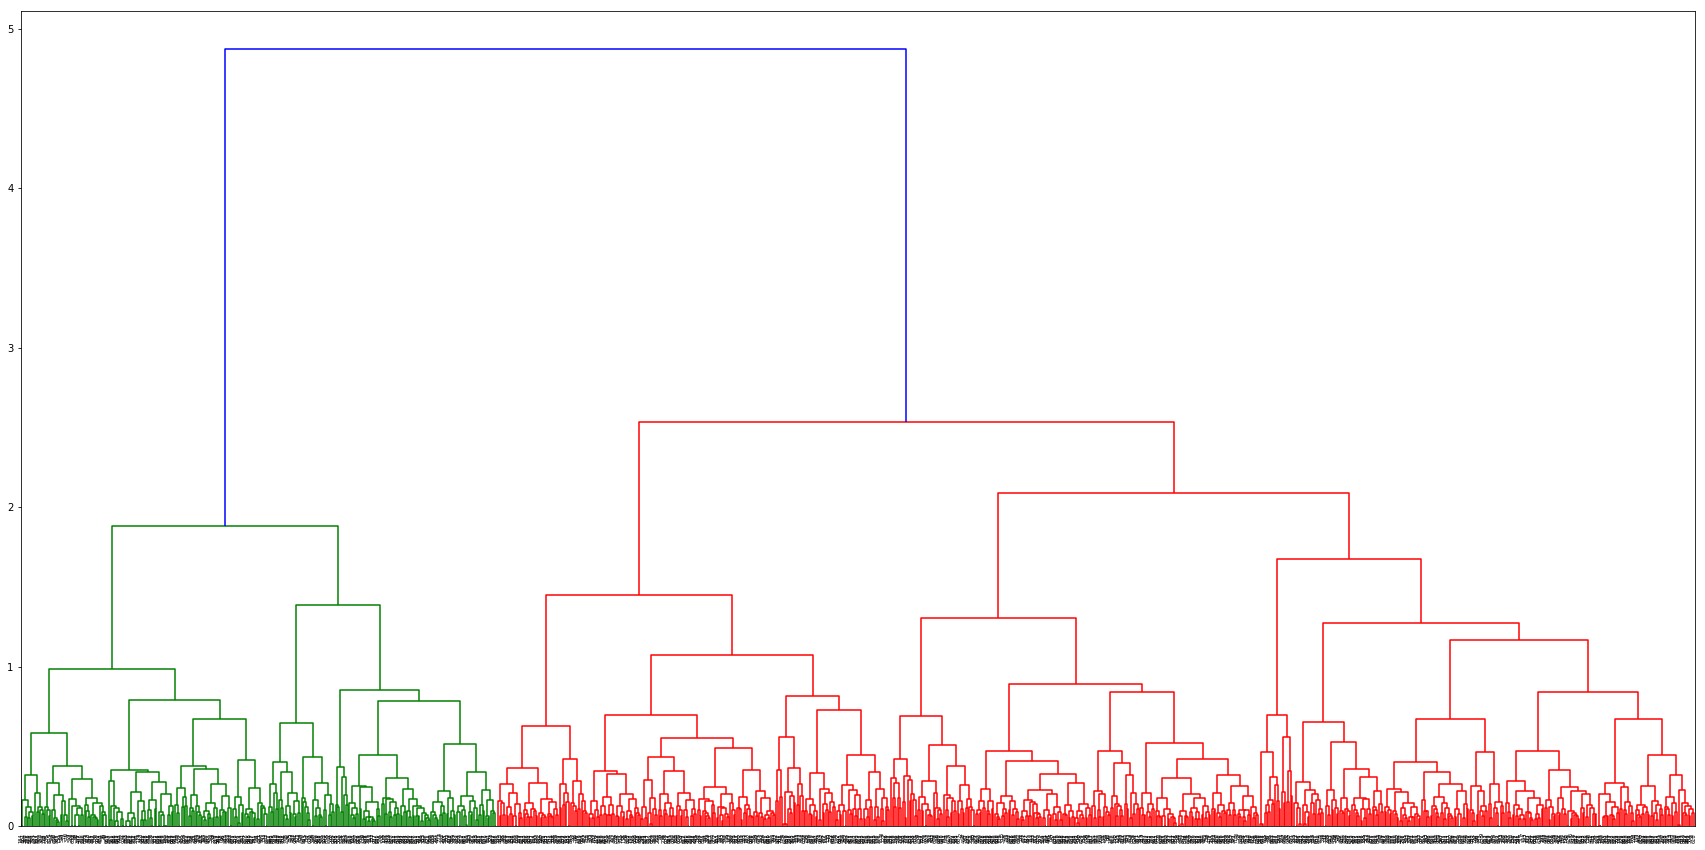

In [34]:
# Plotting Dendrograms # Euclidean+Ward,norm_X
plt.figure(figsize=(30,15))
plcl=dendrogram(f)

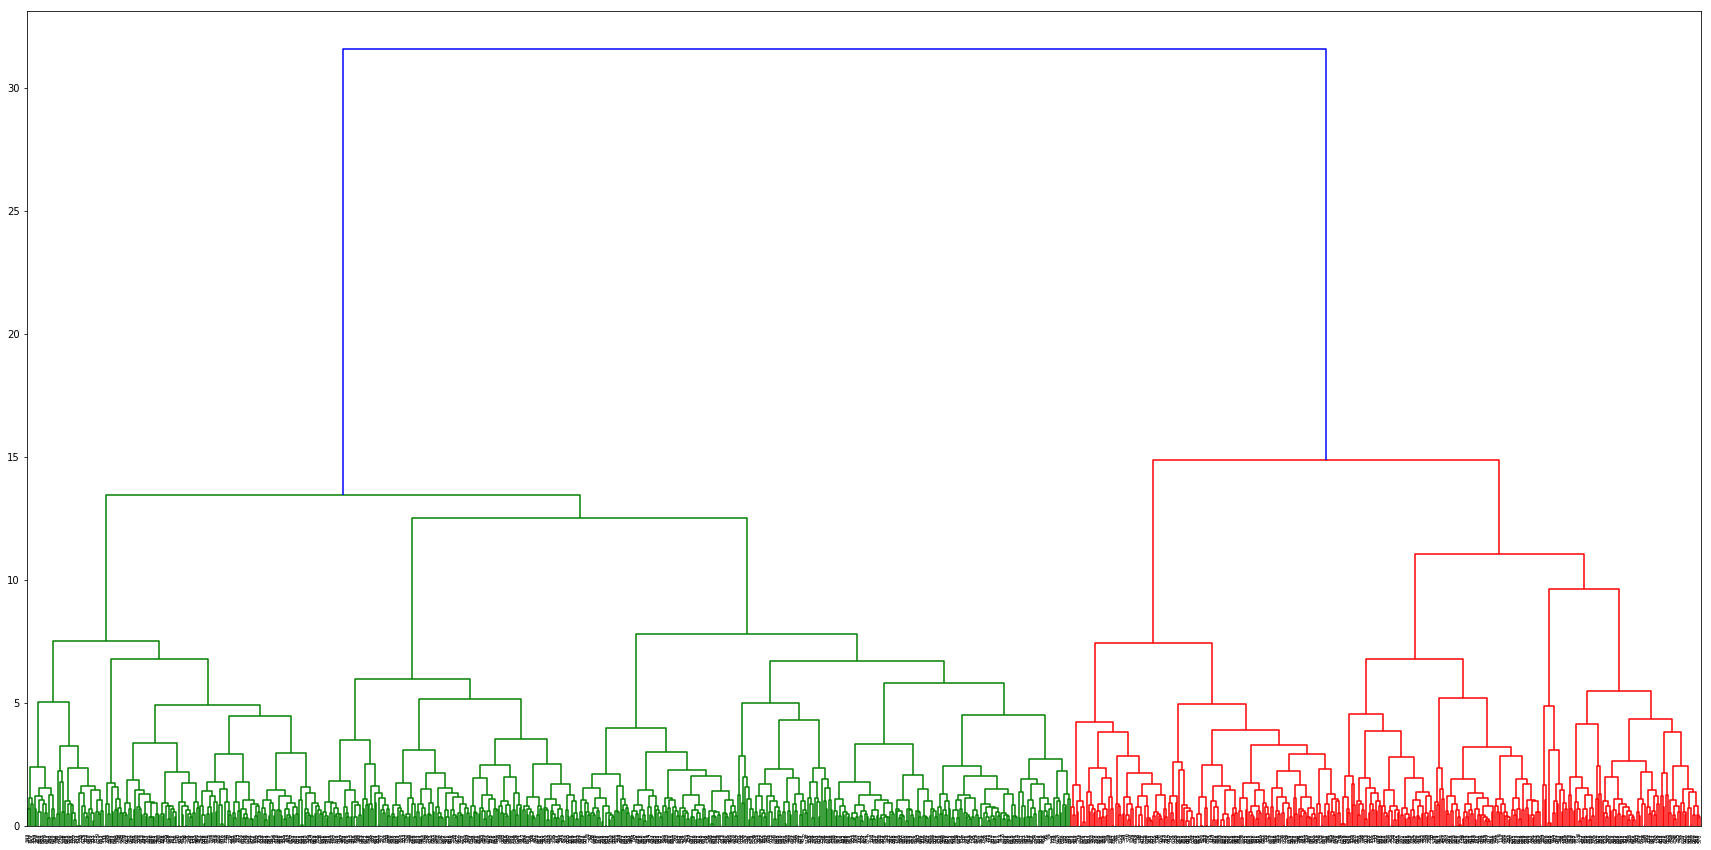

In [35]:
# Plotting Dendrograms # Euclidean+Ward,X
plt.figure(figsize=(30,15))
plcl=dendrogram(f1)

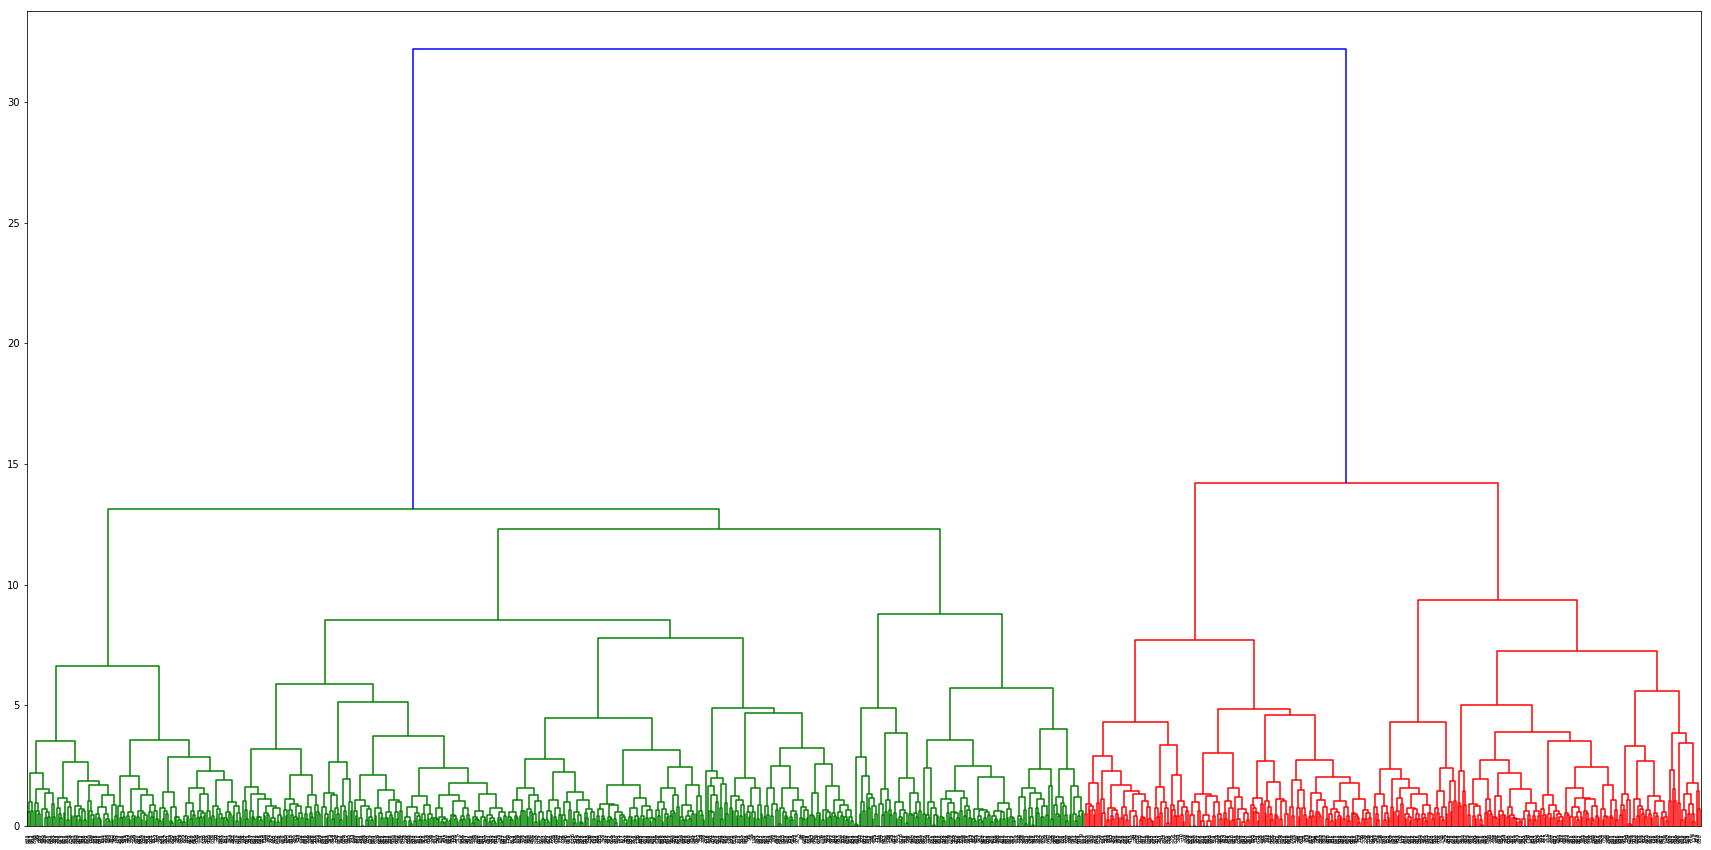

In [36]:
# Plotting Dendrograms # Euclidean+Ward,pca_X
plt.figure(figsize=(30,15))
plcl=dendrogram(f5)

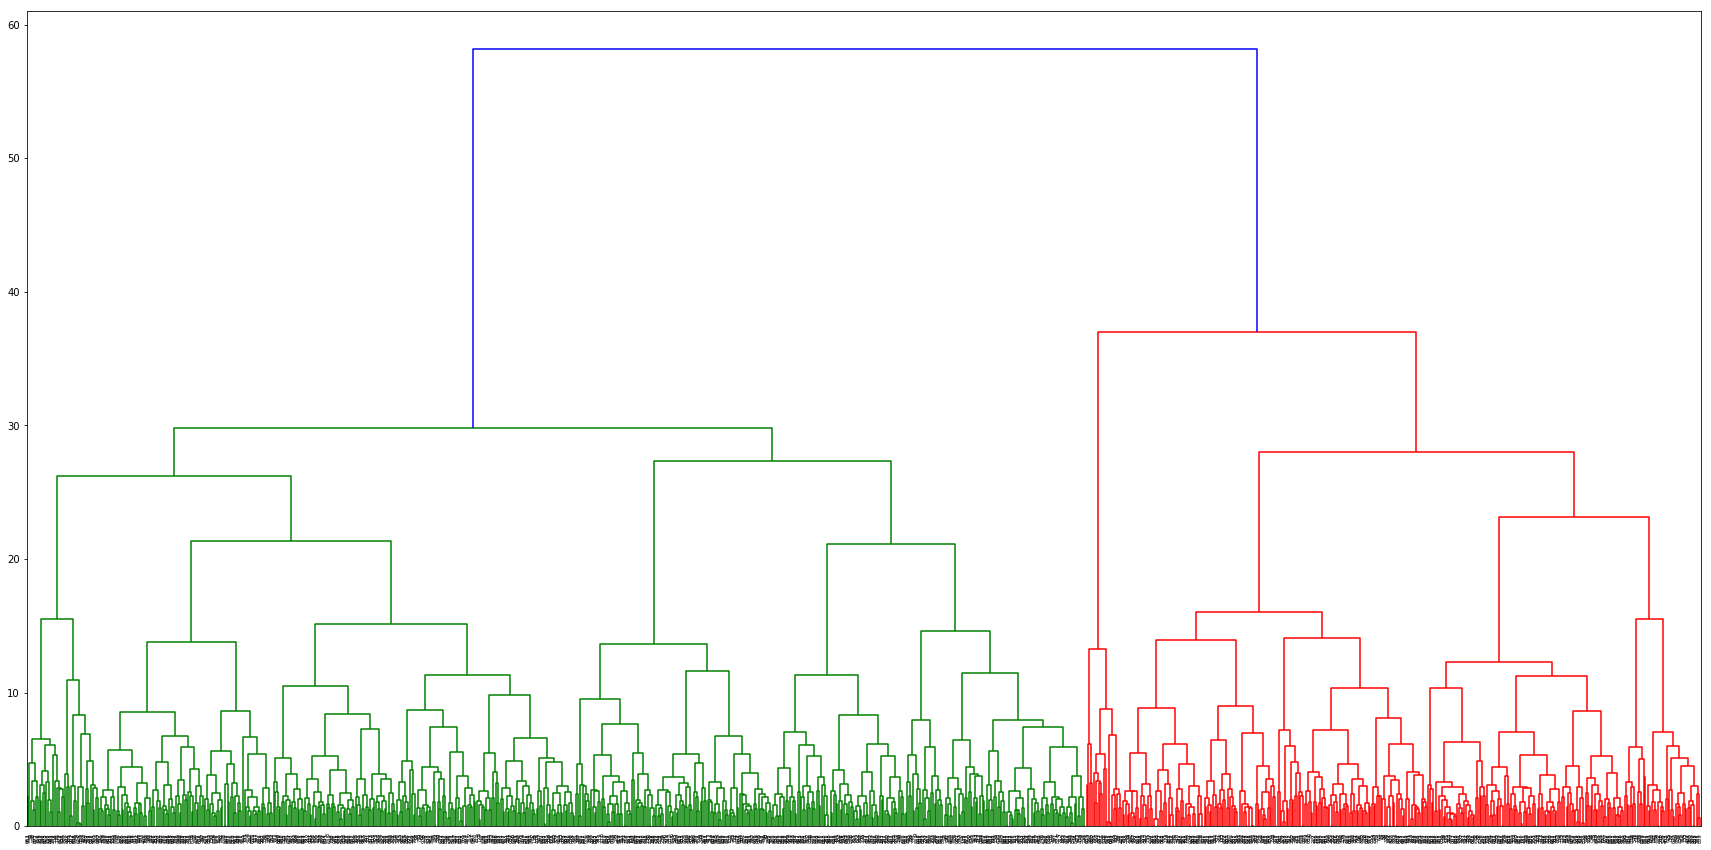

In [37]:
# Plotting Dendrograms # Euclidean+Ward,rescaled_X
plt.figure(figsize=(30,15))
plcl=dendrogram(f6)

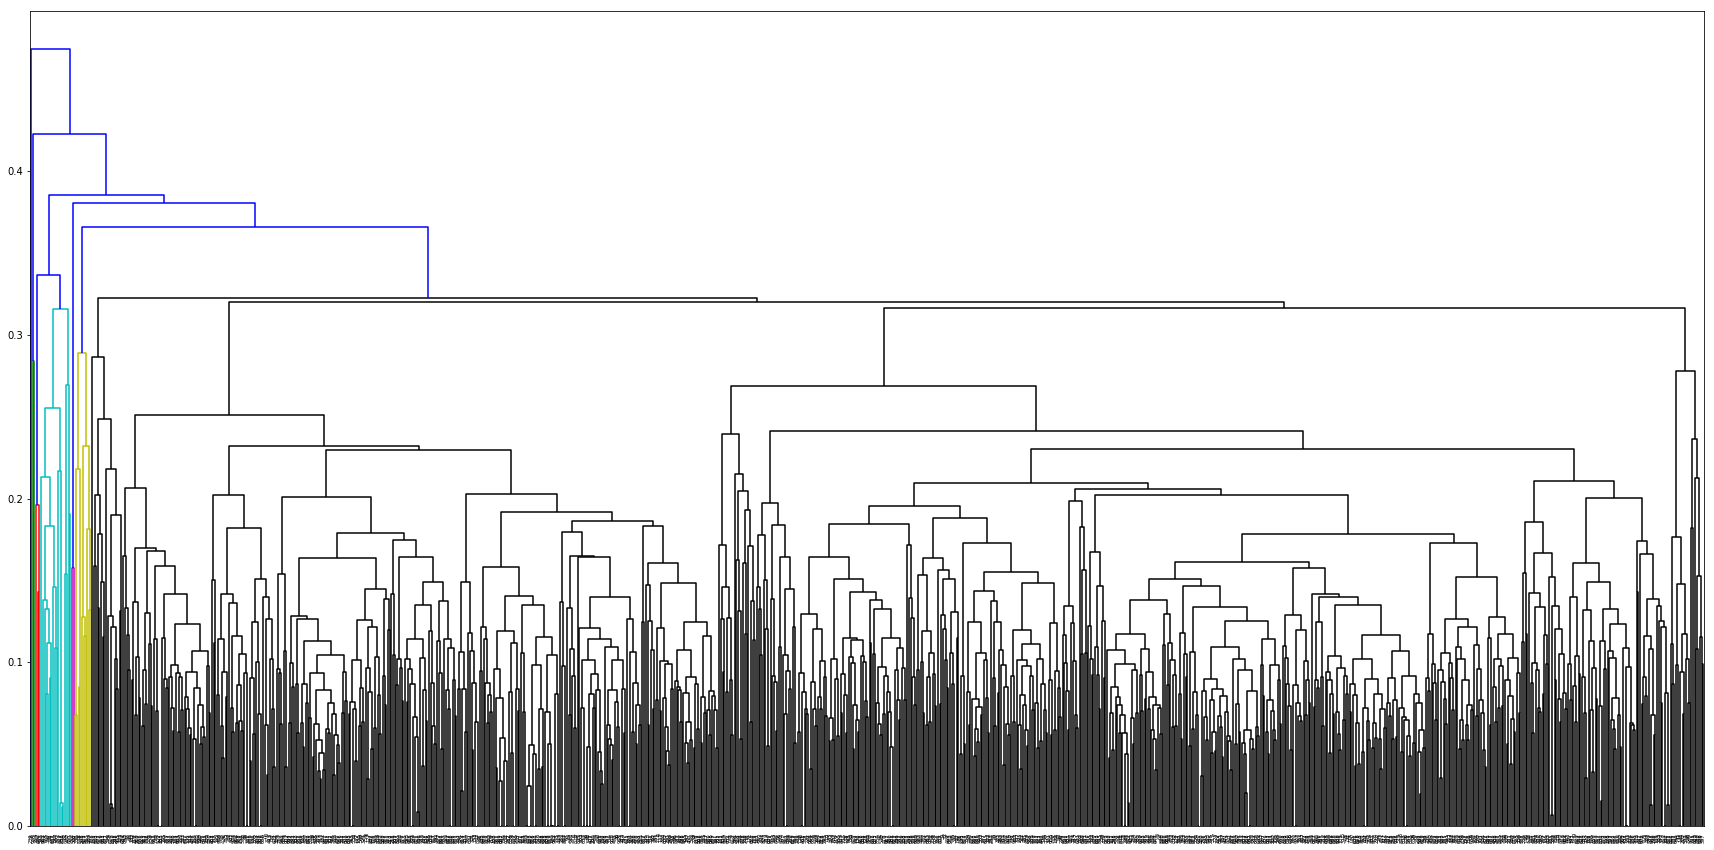

In [39]:
# Plotting Dendrograms # Euclidean+Average,norm_X
plt.figure(figsize=(30,15))
plcl=dendrogram(f3)

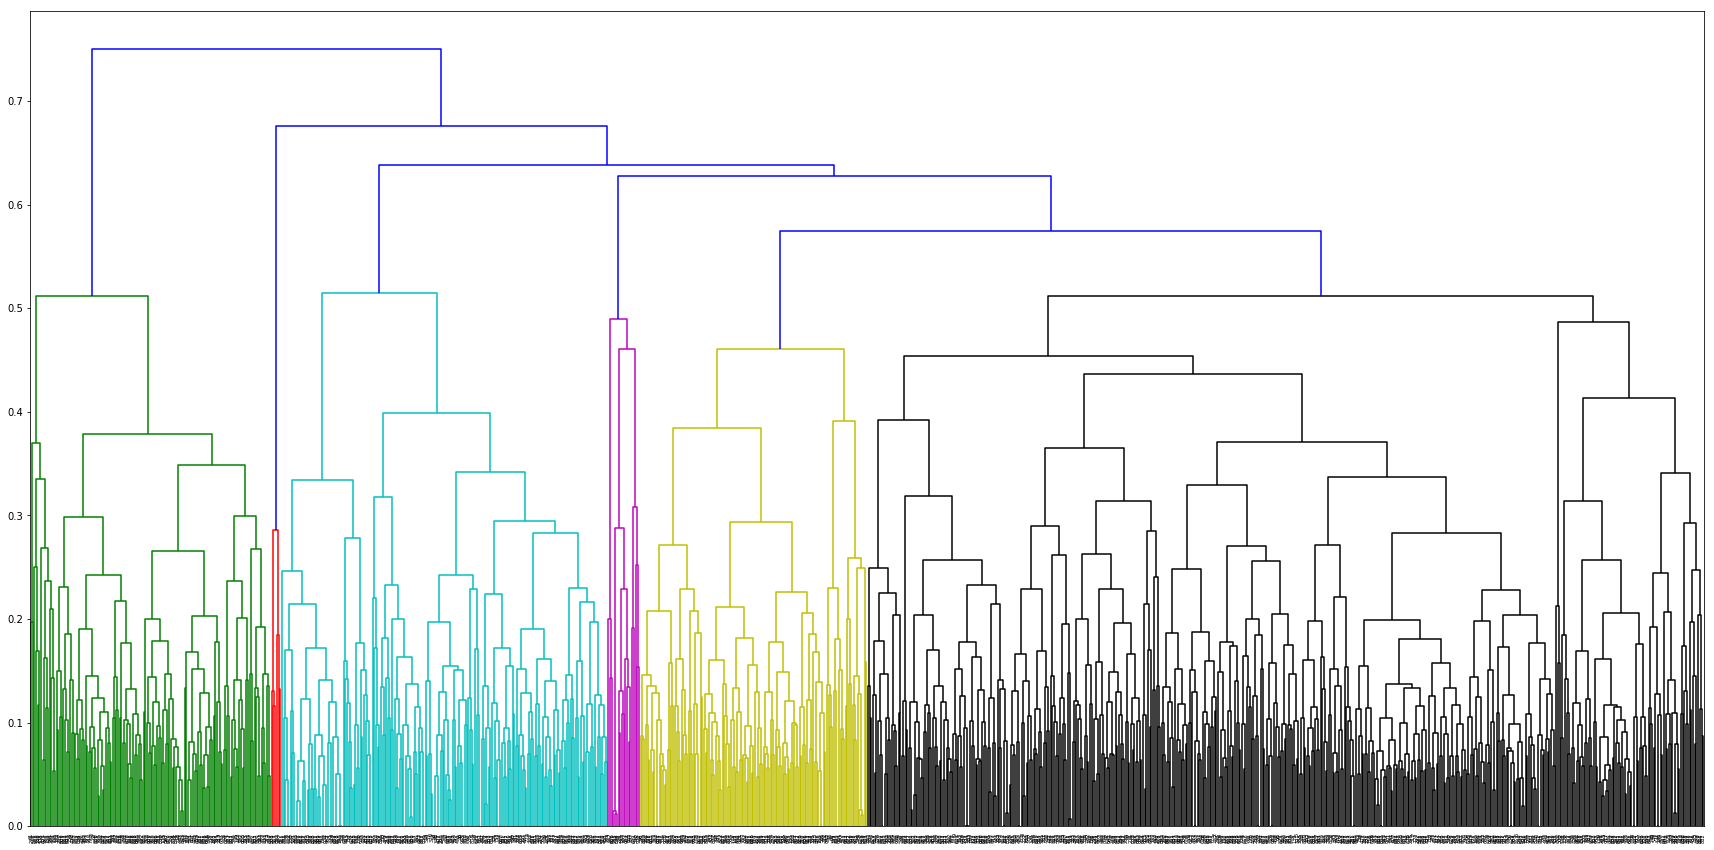

In [41]:
# Plotting Dendrograms # Euclidean+complete,norm_X
plt.figure(figsize=(30,15))
plcl=dendrogram(f4)

In [46]:
from scipy.spatial.distance import pdist

pdist(X,metric="cityblock")


array([2.58, 5.18, 4.64, ..., 5.32, 2.93, 4.83])

In [47]:
pdist(X,metric="euclidean")

array([1.14236597, 2.34721111, 2.33315237, ..., 2.22346576, 1.27440182,
       2.47453026])

In [58]:
# AT 2.33 eucledian distance and norm_X  we get a 2 cluster solution 
max_d=2.33
cl=fcluster(f1,max_d,criterion="maxclust")
print(cl.ravel())


[2 2 1 1 2 1 1 1 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 2 2 2 1 1 2 2 2 2 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2
 2 2 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 1 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 1 2 2 1
 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 1 2 1 1 1 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2
 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2
 1 1 1 2 1 2 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1
 2 1 2 1 2 1 1 2 1 2 1 1 2 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 2 1
 2 2 2 1 2 1 2 2 2 1 2 1 1 2 2 2 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 1 1
 1 1 2 1 1 2 2 1 2 1 1 2 1 2 1 1 1 2 1 2 2 1 2 1 1 1 2 1 1 2 2 2 2 1 1 2 1
 1 1 2 2 1 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1
 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1
 2 2 2 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 2 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1
 1 1 2 2 1 1 2 1 1 1 1 1 

In [57]:
set(fcluster(f1,max_d,criterion="maxclust"))# we get a 2 cluster solution



{1, 2}

In [59]:
## MODEL BUILDING..2##################################
# Hierarchial ---Using sklearn

from sklearn.cluster import AgglomerativeClustering
hclust=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
hclust.fit(norm_X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [60]:
set(hclust.labels_)

{0, 1, 2}

In [62]:
hclust.labels_

array([1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0,
       0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1,
       2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,

In [63]:
# Evaluationg the accuracy 
from sklearn.metrics import silhouette_score

In [64]:
silhouette_avg=silhouette_score(norm_X,hclust.labels_)
silhouette_avg

0.14531952451186897

In [65]:
hclust1=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward") # 2 cluster with normalized data 
hclust1.fit(norm_X)
silhouette_avg=silhouette_score(norm_X,hclust1.labels_)
silhouette_avg

0.28260165335146276

In [66]:
hclust1=AgglomerativeClustering(n_clusters=2,affinity="cosine",linkage="complete") # 2 cluster 
hclust1.fit(norm_X)
silhouette_avg=silhouette_score(norm_X,hclust1.labels_)
silhouette_avg

0.07731985171545218

In [67]:
## 2 CLUSTER -EUCLIDEAN +WORD gives the best score 

In [75]:
## MODEL BUILDING..3  ##################################
# KMeans Algorithm 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [76]:
# KMeans with X 
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.labels_)
silhouette_avg=silhouette_score(X,kmeans.labels_)
silhouette_avg

[1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 

0.30085279300986595

In [77]:
# KMeans with norm_X 
kmeans=KMeans(n_clusters=2)
kmeans.fit(norm_X)
print(kmeans.labels_)
silhouette_avg=silhouette_score(norm_X,kmeans.labels_)
silhouette_avg

[1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 0 1 0 0 

0.29994481565270176

In [78]:
# KMeans with pca_X 
kmeans=KMeans(n_clusters=2)
kmeans.fit(pca_X)
print(kmeans.labels_)
silhouette_avg=silhouette_score(pca_X,kmeans.labels_)
silhouette_avg

[1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 

0.32099507207140154

In [79]:
# KMeans with rescaled_X 
kmeans=KMeans(n_clusters=2)
kmeans.fit(rescaled_X)
print(kmeans.labels_)
silhouette_avg=silhouette_score(rescaled_X,kmeans.labels_)
silhouette_avg

[0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1
 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 1 1 1 1 1 1 1 1 

0.21315362778467906

In [81]:
# KMeans with pca_X ..3 CLUSTERS 
kmeans=KMeans(n_clusters=4)
kmeans.fit(pca_X)
print(kmeans.labels_)
silhouette_avg=silhouette_score(pca_X,kmeans.labels_)
silhouette_avg

[3 3 1 1 3 1 1 1 2 2 2 2 0 0 3 3 0 0 3 0 2 2 1 1 2 0 3 2 1 3 0 0 3 2 1 1 1
 1 0 1 2 1 2 2 2 1 1 2 2 0 2 0 2 2 1 1 0 1 3 3 3 1 1 1 2 1 0 1 0 1 1 0 2 0
 0 3 1 0 1 2 1 2 1 2 2 1 1 1 2 2 1 1 3 3 3 1 0 0 0 2 2 1 3 1 1 0 2 1 1 3 2
 0 2 0 0 2 2 2 1 2 3 2 3 2 3 1 1 2 2 1 0 3 3 3 2 2 0 0 2 1 2 1 2 1 2 2 2 3
 2 3 2 2 1 2 1 1 2 1 3 1 0 1 2 1 1 1 0 2 0 0 2 1 1 1 2 2 2 1 2 1 1 3 3 0 3
 2 2 1 3 1 0 0 1 2 2 1 0 3 1 2 3 2 0 1 1 1 2 1 0 1 1 0 2 1 1 3 1 1 3 0 2 1
 0 1 3 1 2 0 2 0 1 3 1 1 2 2 3 2 2 1 0 3 1 1 1 1 1 3 1 2 0 1 0 0 1 2 1 2 1
 3 2 3 2 3 1 3 3 2 1 3 2 1 0 0 3 1 0 2 1 2 0 2 0 3 2 1 2 2 2 2 3 1 1 1 1 1
 1 0 0 2 1 0 0 1 3 1 2 3 1 0 1 1 0 3 2 2 3 1 0 1 2 1 2 1 1 3 3 3 3 2 2 0 1
 2 1 3 0 1 2 1 3 3 0 0 2 1 2 1 0 3 1 1 3 1 1 1 2 0 2 1 1 3 3 1 2 3 2 2 0 2
 0 0 2 3 2 3 3 2 1 2 1 1 2 0 1 3 3 2 1 1 3 1 3 1 2 0 0 2 1 3 1 0 2 1 3 3 0
 3 3 3 2 2 3 3 2 0 1 1 1 3 0 1 2 1 3 2 3 1 1 2 0 3 3 3 3 1 1 2 2 1 1 1 2 2
 0 1 3 0 3 2 1 1 2 3 1 3 1 1 3 1 2 2 2 0 1 0 1 1 1 1 0 1 1 2 0 0 0 1 0 3 1
 0 1 3 3 0 2 2 1 2 0 1 1 

0.18521605074102623